In [12]:
import numpy as np
import pandas as pd
import datetime as dt 
import pandas_datareader.data as web
import matplotlib.pyplot as plt

### Derivatives
We have stated that a futures contract is a derivative, so let's be clear on what a derivative is. A derivative is a financial instrument whose value is dependent on the value of an underlying asset. This can be a complex relationship or it can be something very simple. Derivatives have been constructed for a variety of different purposes in order to make more and more intricate bets about the markets. They provide new ways to express your expectations of how the markets will move and are used to great effect in conjunction with more conventional investments. Large amounts of resources are devoted to the construction and pricing of exotic derivatives, though that is beyond the scope of this lecture.

A futures contract is a standardized version of one of the simplest possible derivatives, the forward contract. Let's look at how forward contracts behave to give us a little more background on futures.

### Forward Contracts
A futures contract at its heart is based on a derivative called a forward contract. This is an agreement between two parties to pay a delivery price, $K$, for an asset at some predetermined point in the future. Forward contracts are basic over the counter (OTC) derivatives, typically used for hedging. They are used for neutralizing risk by locking the price for an asset, obligating both sides of the contract to follow through.

Entering into a long position on a forward contract entails agreeing to buy the underlying asset while entering into a short position entails agreeing to sell the underlying. Let's say that the price of the good is denotated by $S_i$, indexed with time, with $T$ being the maturity date of the forward contract. Then the payoff of a long position in a forward contract is:

$$ S_T - K $$
And the payoff of a short position in a forward contract is:

$$ K - S_T$$
Where $S_T$ is the value of the underlying at maturity and $K$ is the value agreed upon for the underlying at maturity. The specific value of $K$ is negotiated between the parties entering into a forward contract together so it can vary quite a bit, depending on the relevant parties.

The payoff of a derivative is simply the realized cash value at the end of its life. This settlement can take place with either the delivery and exchange of actual goods or a simple cash settlement. As we can see in the following graphs, a forward contract has a linear payoff.



In [4]:
# K is the delivery price agreed upon in the contract
K = 50
# Here we look at various different values that S_T can have
S_T = np.linspace(0, 100, 200)
# Calculate the long and short payoffs
long_payoff = S_T - K
short_payoff = K - S_T

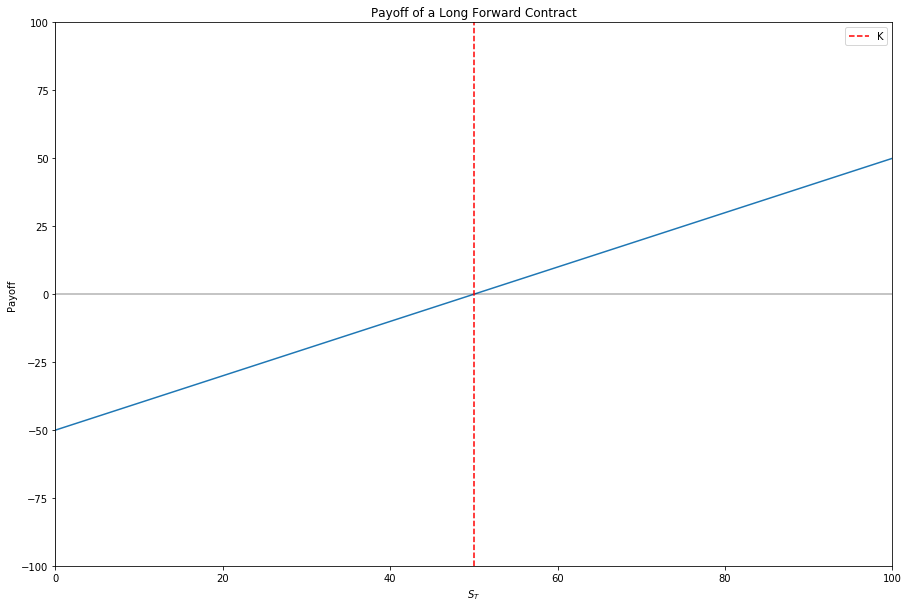

In [8]:
# Long side payoff
plt.figure(figsize = (15, 10))
plt.plot(S_T, long_payoff)
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.axvline(K, linestyle='dashed', color='r', label='K')
plt.ylabel('Payoff')
plt.xlabel('$S_T$')
plt.title('Payoff of a Long Forward Contract')
plt.legend();

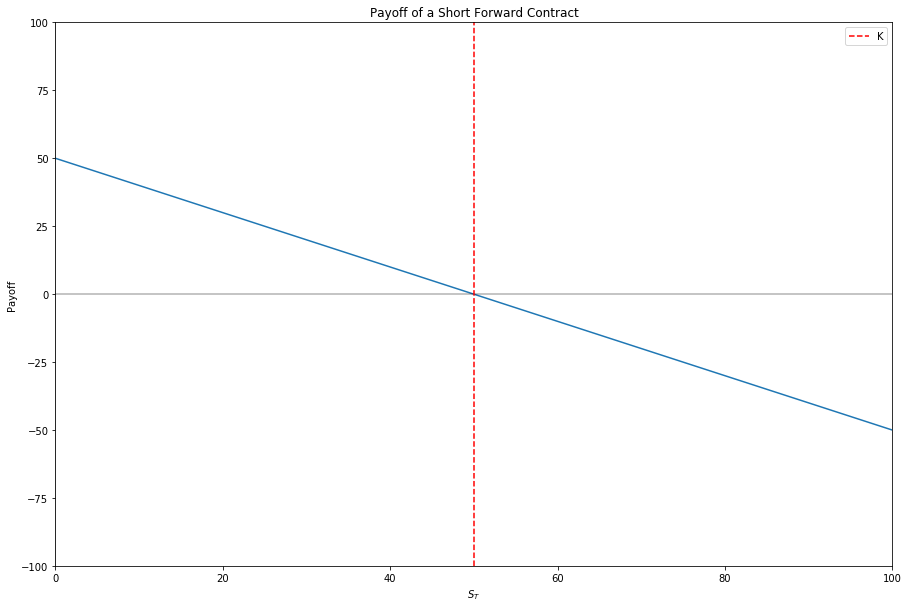

In [10]:
# Short side payoff
plt.figure(figsize = (15, 10))
plt.plot(S_T, short_payoff);
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.axvline(K, linestyle='dashed', color='r', label='K')
plt.ylabel('Payoff')
plt.xlabel('$S_T$')
plt.title('Payoff of a Short Forward Contract')
plt.legend();

Hedging with a forward contract serves to help remove any sort of uncertainty about the price that you will pay (or be paid) for a good. If you are a producer, you can easily protect yourself against falling prices by using a short position in a forward contract with a delivery price that you find amenable. Similarly, if you are a buyer, you can easily protect yourself with a long position.

### Real data practice

Text(0, 0.5, 'Price')

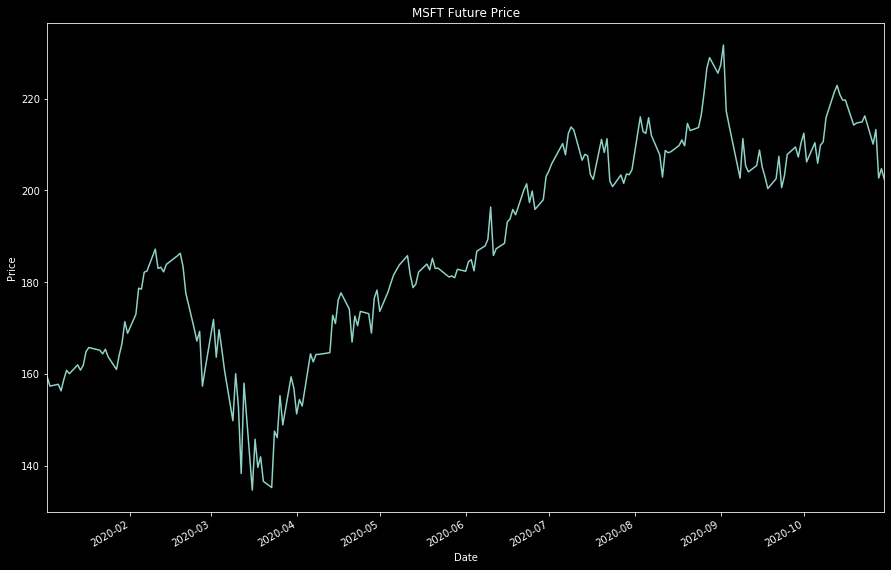

In [29]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 11, 1)
df_MSFT = web.DataReader('MSFT', 'yahoo', start, end)
df_MSFT_price = df_MSFT['Adj Close']
df_MSFT.name = 'MSFT Future Price'
plt.figure(figsize = (15, 10))
plt.style.use('dark_background')
df_MSFT_price.plot()
plt.title(df_MSFT.name)
plt.xlabel('Date')
plt.ylabel('Price')